## Banknote Authentication Dataset

#### Author: Sonali B Sreedhar

In [ ]:
#load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics    
from collections import OrderedDict

In [17]:
cd

/Users/sonalisreedhar


In [18]:
cd Desktop

/Users/sonalisreedhar/Desktop


### Importing data and reading

In [58]:
A=np.loadtxt("data_banknote_authentication.txt",delimiter=',')
Total_data=len(A)
X=A[:,0:4]
f1=X[:,0]
f2=X[:,1]
f3=X[:,2]
f4=X[:,3]
y=A[:,4]



### Scatterplot

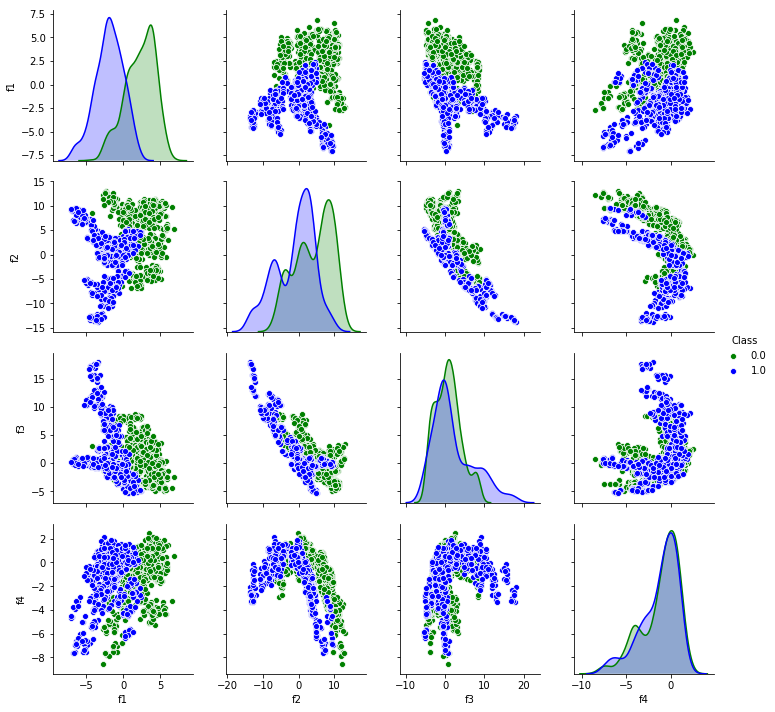

In [215]:
import seaborn as sns
colors=['green','blue']
df=pd.DataFrame(A,columns=['f1','f2','f3','f4','Class'])
grid=sns.pairplot(data=df,kind='scatter',vars=['f1','f2','f3','f4'],hue='Class',diag_kind='kde',palette= colors)
plt.show()

### Boxplots

<Figure size 432x288 with 0 Axes>

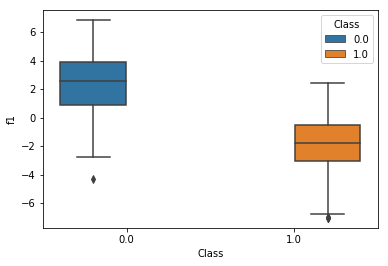

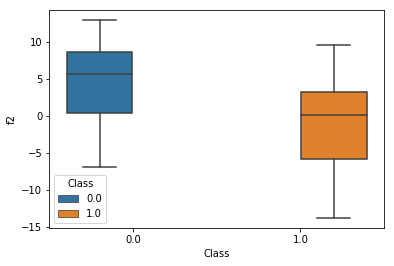

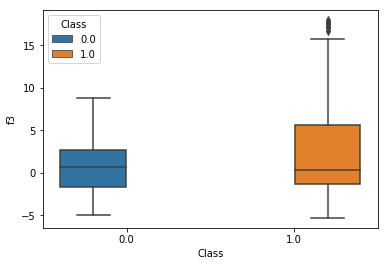

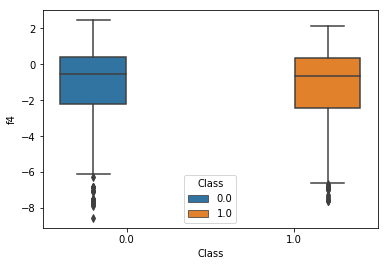

<Figure size 432x288 with 0 Axes>

In [48]:
ax = sns.boxplot(x='Class', y="f1", data=df,hue='Class')
plt.figure()
ax1 = sns.boxplot(x='Class', y="f2", data=df,hue='Class')
plt.figure()
ax2 = sns.boxplot(x='Class', y="f3", data=df,hue='Class')
plt.figure()
ax3 = sns.boxplot(x='Class', y="f4", data=df,hue='Class')
plt.figure()


In [233]:
def splitData(df, headSize):
    """
    This function splits the data based on the head size .    
    """
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

def getData(a,b):
    """
    This function combines 2 dataframes.     
    """
    x = pd.concat([a, b], sort=False)    
    y = x['Class']
    return x,y

data_0 = df.loc[df['Class']==0]
test_0, train_0 = splitData(data_0, 200)
data_1 = df.loc[df['Class']==1]
test_1, train_1 = splitData(data_1, 200)
X_tr, Y_train = getData(train_0, train_1)
X_test, Y_test = getData(test_0, test_1)

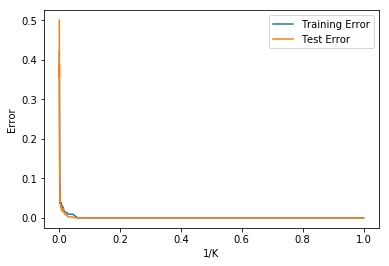

The optimal value of k (highest) is 19


Text(0.5, 1.0, 'Error vs k')

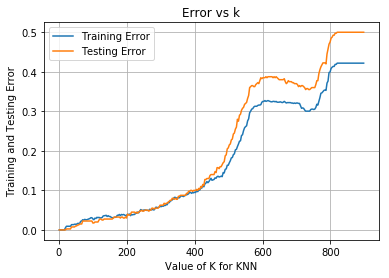

In [234]:
neighbors = list(range(1,901,3))
kinv = []
k2=[]
training_error = []
test_error = []
best_error = 1
X_train = X_tr.drop(columns = ['Class'])
X_test = X_test.drop(columns = ['Class'])

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(np.array(X_train), np.array(Y_train))
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    tr_error = 1 - metrics.accuracy_score(Y_train, train_pred)
    t_error = 1 - metrics.accuracy_score(Y_test, test_pred)
    training_error.append(tr_error)
    test_error.append(t_error) 
    if t_error <= best_error:
        best_error = t_error
        kstar = k
    kinv.append(1/k)
    k2.append(k)

plt.plot(kinv, training_error, label= 'Training Error')
plt.plot(kinv, test_error, label= 'Test Error')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.legend()
plt.show()
    
print("The optimal value of k (highest) is %d" % kstar)

#plt.figure(figsize=(15,10))
plt.plot(k2, training_error, label='Training Error')
plt.plot(k2, test_error, label='Testing Error')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Error')
plt.title('Error vs k')

### Confusion Matrix and Classification Report

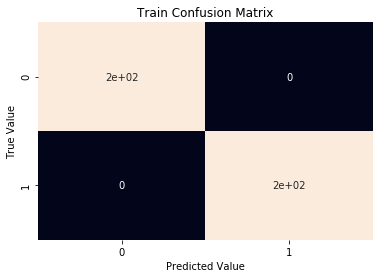

<Figure size 432x288 with 0 Axes>

Classification report: 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       200
        1.0       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400

TN - True Negative :200
FP - False Positive :0
FN - False Negative :0
TP - True Positive :200
Accuracy Rate: 1.0
Misclassification Rate: 0.0
True Negative Rate: 1.0
True Positive Rate: 1.0
Precision: 1.0
F-score: 1.0


In [211]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(np.array(X_train), np.array(Y_train))
pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, cbar= False, ax = ax);
plt.title('Train Confusion Matrix') 
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
plt.figure()
plt.show()
print('Classification report: \n',classification_report(Y_test, pred))
print('TN - True Negative :{}'.format(cm[0,0]))
print('FP - False Positive :{}'.format(cm[0,1]))
print('FN - False Negative :{}'.format(cm[1,0]))
print('TP - True Positive :{}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.
sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1
,0]]),np.sum(cm))))
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Precision = TP/(TP+FP)
Fscore = 2*TP/(2*TP+FP+FN)

print('True Negative Rate:', TNR)
print('True Positive Rate:', TPR)
print('Precision:', Precision)
print('F-score:', Fscore)

### Learning curves

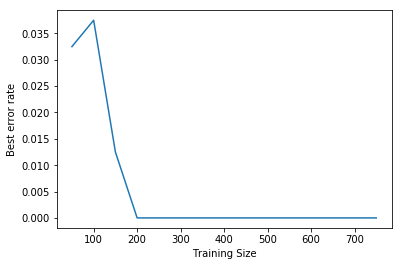

NameError: name 'k2' is not defined

<Figure size 1080x720 with 0 Axes>

In [216]:
N = list(range(50, 800, 50))
min_test_error = []
for n in range(50, 800, 50):
    
    #split the train data from a(iii) into N/2
    train_data = X_tr.loc[X_tr['Class']==0].head(n//2)
    test_data = X_tr.loc[X_tr['Class']==1].head(n//2)
    x_train= pd.concat([train_data,test_data], sort=False)    
    y_train = x_train['Class']
    x_train = x_train.drop(columns = ['Class'])
    
    neighbors = list(range(1,n,40))
    test_scores = []    
    optimal_k = []
    for k in range(1,n,40):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(np.array(x_train), np.array(y_train))
        test_pred = knn.predict(X_test)
        test_scores.append(metrics.accuracy_score(Y_test, test_pred))
    test_error= [1 - t for t in test_scores]
    min_test_error.append(min(test_error))           

plt.plot(N, min_test_error)
plt.xlabel('Training Size')
plt.ylabel('Best error rate')
plt.show()


### Manhattan distance with logarithmetic distance

In [117]:
def logDist(x, y,**kwargs):
    """
    This function gives a user defined minkowiski distance metric for logp values.    
    """
    p = kwargs["t"]
    return np.sum(abs(np.subtract(x,y))**p)**(1/p)



logminkowiski_test_error= []
best_error = 1
best_logp = 0
for p in np.arange(0.1, 1.1, 0.1):    
    knn_log_minkowiski= KNeighborsClassifier(n_neighbors=11, metric = logDist ,metric_params={'t': 10**p })
    knn_log_minkowiski.fit(np.array(X_train), np.array(Y_train))
    log_minkowiski_test_pred = knn_log_minkowiski.predict(X_test)
    logmtest_error = 1 - metrics.accuracy_score(Y_test, log_minkowiski_test_pred)
    logminkowiski_test_error.append(logmtest_error)
    if logmtest_error <= best_error:
        best_error = logmtest_error
        best_logp = p
       
print("The best log10p: ", best_logp)

The best log10p:  1.0


#### Manhattan distance metric

In [169]:
neighbors = list(range(1,901,10))  
best_test_error =[]
manhattan_test_error = []
optimal_k = []
best_error = 1
for k in neighbors:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan.fit(np.array(X_train), np.array(Y_train))
    manhattan_test_pred = knn_manhattan.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, manhattan_test_pred)
    manhattan_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(manhattan) is %d" % kstar)

The optimal value of k(manhattan) is 11


#### Chebyshev metric

In [170]:
neighbors = list(range(1,901,10))  
best_test_error =[]
manhattan_test_error = []
optimal_k = []
best_error = 1
for k in neighbors:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric= 'chebyshev')
    knn_manhattan.fit(np.array(X_train), np.array(Y_train))
    manhattan_test_pred = knn_manhattan.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, manhattan_test_pred)
    manhattan_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(chebyshev) is %d" % kstar)

The optimal value of k(chebyshev) is 11


#### MAhalanobis Metric

In [175]:
neighbors = list(range(1,901,10))  
mahalanobis_test_error = [] 
best_error = 1
for k in neighbors:    
    knn_mahalanobis= KNeighborsClassifier(n_neighbors=k, metric ='mahalanobis',metric_params={'V': np.cov(X_train.T)})
    knn_mahalanobis.fit(np.array(X_train), np.array(Y_train))
    mahalanobis_test_pred = knn_mahalanobis.predict(X_test)
    mhbtest_error = 1 - metrics.accuracy_score(Y_test, mahalanobis_test_pred)
    mahalanobis_test_error.append(mhbtest_error)  
    if mhbtest_error <= best_error:
        best_error = mhbtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(mahalanobis) is %d" % kstar)

The optimal value of k(mahalanobis) is 11


In [176]:
metric = OrderedDict({'Metric': ['Manhattan', 'Chebyshev', 'Mahalanobis'],
         'Optimal_k (Highest)': optimal_k,
         'Best_error': best_test_error})
metric_table = pd.DataFrame.from_dict(metric)
metric_table

,Metric,Optimal_k (Highest),Best_error
0,Manhattan,11,0.0
1,Chebyshev,11,0.0
2,Mahalanobis,11,0.0


### Weighted metric

In [200]:
neighbors = list(range(1,901,10))  
best_test_error =[]
manhattan_test_error = []
optimal_k = []
best_error = 1
for k in neighbors:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric= 'manhattan',weights='distance')
    knn_manhattan.fit(np.array(X_train), np.array(Y_train))
    manhattan_test_pred = knn_manhattan.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, manhattan_test_pred)
    manhattan_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(manhattan) is %d" % kstar)


#best_test_error =[]
chebyshev_test_error = []
#optimal_k = []
#best_error = 1

for k in neighbors:
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric= 'chebyshev',weights='distance')
    knn_chebyshev.fit(np.array(X_train), np.array(Y_train))
    chebyshev_test_pred = knn_chebyshev.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, chebyshev_test_pred)
    chebyshev_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(chebyshev) is %d" % kstar)
 
euclidean_test_error = [] 
#best_test_error =[]
#best_error = 1
for k in neighbors:    
    knn_euclidean= KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_euclidean.fit(np.array(X_train), np.array(Y_train))
    euclidean_test_pred = knn_euclidean.predict(X_test)
    eubtest_error = 1 - metrics.accuracy_score(Y_test, euclidean_test_pred)
    euclidean_test_error.append(eubtest_error)  
    if eubtest_error <= best_error:
        best_error = eubtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(Euclidean) is %d" % kstar)


The optimal value of k(manhattan) is 81
The optimal value of k(chebyshev) is 481
The optimal value of k(Euclidean) is 51


In [205]:
weighted_metric = OrderedDict({'weighted_Metric': ['Manhattan', 'Chebyshev', 'Euclidean'],
         'Optimal_k (Highest)': optimal_k,
         'Best_error': best_test_error})
metric_table = pd.DataFrame.from_dict(weighted_metric)
metric_table

,weighted_Metric,Optimal_k (Highest),Best_error
0,Manhattan,81,0.0
1,Chebyshev,481,0.0
2,Euclidean,51,0.0


In [206]:
print("The lowest training error is %d" % min(training_error))

The lowest training error is 0
